In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from scipy.special import gamma
from scipy.stats import beta

In [2]:
x_min=0
x_max=500
def f_alpha(mu,sigma):
    return mu**2*(1-mu)/sigma**2-mu
def f_beta(mu,sigma):
    return mu*(1-mu)**2/sigma**2-1+mu
mu=100
sigma=0.5*mu
a=f_alpha(mu/(x_max-x_min),sigma/(x_max-x_min))
b=f_beta(mu/(x_max-x_min),sigma/(x_max-x_min))

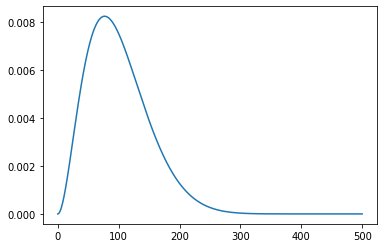

In [3]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,
                x_max, 1000)
ax.plot(x, beta.pdf(x, a, b,0,x_max))
        #,
       #'r-', lw=5, alpha=0.6, label='beta pdf')

In [4]:
N_households_df=pd.read_excel('Parameters_residential.xlsx',sheet_name="Number_of_households")
E_sqm_df=pd.read_excel('Parameters_residential.xlsx',sheet_name="Energy_per_sqm")

In [5]:
N_households_df.set_index(['AREA','Heating_system'],inplace=True)
N_households_df.index.get_level_values('Heating_system').unique().to_list()

['Biomass',
 'Oil',
 'Gas',
 'District heating',
 'Electricity',
 'Heat pump a-w',
 'Heat pump a-a',
 'Heat pump hybrid',
 'Heat pump w-w']

In [9]:
E_sqm_df

,AREA,Heating_system,Energy_per_sqm
0,BE,Biomass,124.933754
1,BE,Oil,106.953111
2,BE,Gas,99.028759
3,BE,District heating,82.061523
4,BE,Electricity,111.178778
5,BE,Heat pump a-w,79.618299
6,BE,Heat pump a-a,0.000000
7,BE,Heat pump hybrid,0.000000
8,BE,Heat pump w-w,0.000000
9,DE,Biomass,135.189361


In [22]:
def create_database(N_households_df,E_sqm_df,E_min=0,E_max=500,sigma_out_of_mu=0.5):
    L_heating_sys=N_households_df.index.get_level_values('Heating_system').unique().to_list()
    dict_base={'Heating_system':[],'Energy_consumption':[],'Surface':[],'Number':[]}
    for hs in L_heating_sys:
        N=N_households_df.loc[hs,'Number']
        mu=E_sqm_df.loc[hs,'Energy_per_sqm']
        if N>0:
            sigma=sigma_out_of_mu*mu
            a=f_alpha(mu/(E_max-E_min),sigma/(E_max-E_min))
            b=f_beta(mu/(E_max-E_min),sigma/(E_max-E_min))
        for E in range(int(round(E_max))):
            dict_base['Heating_system'].append(hs)
            dict_base['Energy_consumption'].append(E)
            dict_base['Surface'].append(N_households_df.loc[hs,'Surface_avg'])
            if N>0:
                dict_base['Number'].append(int(round(N_households_df.loc[hs,'Number']*(beta.pdf(E,a,b,E_min,E_max)\
                                                                         +beta.pdf(E+1,a,b,E_min,E_max))/2)))
            else:
                dict_base['Number'].append(0)
    return pd.DataFrame(dict_base).set_index(['Heating_system','Energy_consumption'])

N_households_df=pd.read_excel('Parameters_residential.xlsx',sheet_name="Number_of_households")
E_sqm_df=pd.read_excel('Parameters_residential.xlsx',sheet_name="Energy_per_sqm")

N_households_df_BE=N_households_df[N_households_df.AREA=='BE'].drop('AREA',axis=1)
E_sqm_df_BE=E_sqm_df[E_sqm_df.AREA=='BE'].drop('AREA',axis=1)

N_households_df_BE.set_index('Heating_system',inplace=True)
E_sqm_df_BE.set_index('Heating_system',inplace=True)

db_BE=create_database(N_households_df_BE,E_sqm_df_BE)

In [37]:
sum(db_BE.loc[('Oil',E),'Number'] for E in range(200,500))

113500